# Analysis:

In [130]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import islice
plt.style.use('fivethirtyeight')

In [131]:
df = pd.read_csv('../data/df_for_analysis.csv')

In [164]:
type(pd.to_numeric(df['result']))

pandas.core.series.Series

In [132]:
df = df[['result', 'won_by', 'game_time', 'color', 'end_time',
         'weekday', 'day', 'num_moves', 'castled', 'opp_castled',
         'castled_on', 'opp_castled_on', 'time_used', 'opp_time_used',
         'post_elo', 'opp_post_elo', 'diff']]

In [133]:
df['time_used'] = round((df['time_used']/df['game_time'])*100)
df['time_used'] = np.where(df['time_used']>100,100,df['time_used'])
df['opp_time_used'] = round((df['opp_time_used']/df['game_time'])*100)
df['opp_time_used'] = np.where(df['opp_time_used']>100,100,df['opp_time_used'])

In [134]:
df.columns

Index(['result', 'won_by', 'game_time', 'color', 'end_time', 'weekday', 'day',
       'num_moves', 'castled', 'opp_castled', 'castled_on', 'opp_castled_on',
       'time_used', 'opp_time_used', 'post_elo', 'opp_post_elo', 'diff'],
      dtype='object')

In [135]:
df.head()

,result,won_by,game_time,color,end_time,weekday,day,num_moves,castled,opp_castled,castled_on,opp_castled_on,time_used,opp_time_used,post_elo,opp_post_elo,diff
0,0.00,8,600,1,14.00,0,2,38,1,1,15,10,57.00,67.00,869,1112,-243
1,1.00,6,600,0,17.00,2,15,63,-1,-1,0,0,83.00,100.00,973,755,218
2,0.50,5,600,1,18.00,2,15,44,-1,-1,0,0,42.00,37.00,975,980,-5
3,0.00,8,600,0,11.00,3,16,27,-1,0,0,11,35.00,47.00,949,1383,-434
4,0.00,8,600,0,11.00,3,16,37,-1,1,0,5,47.00,58.00,876,1024,-148


In [162]:
df[df['diff']>200]

,result,won_by,game_time,color,end_time,weekday,day,num_moves,castled,opp_castled,castled_on,opp_castled_on,time_used,opp_time_used,post_elo,opp_post_elo,diff
1,1.00,6,600,0,17.00,2,15,63,-1,-1,0,0,83.00,100.00,973,755,218
91,1.00,6,600,0,20.00,4,28,20,1,-1,7,0,40.00,100.00,839,579,260
774,1.00,7,180,1,22.00,0,4,25,1,1,10,6,61.00,44.00,898,696,202
775,1.00,6,180,0,22.00,0,4,30,-1,-1,0,0,100.00,100.00,902,692,210
1057,0.00,6,180,0,13.00,0,5,64,1,-1,12,0,100.00,100.00,793,291,502
1181,1.00,2,600,0,8.00,2,7,15,-1,-1,0,0,15.00,27.00,944,734,210
1521,1.00,7,300,0,17.00,6,20,35,0,1,21,7,70.00,90.00,893,687,206
1554,1.00,2,600,0,20.00,2,23,15,1,-1,15,0,15.00,32.00,876,659,217
1754,1.00,6,300,0,16.00,5,14,42,1,1,7,6,60.00,100.00,936,593,343
1760,1.00,8,300,0,17.00,5,14,58,1,1,7,5,57.00,73.00,953,653,300


In [158]:
df_win = df[df['result']==1]
df_lost = df[df['result']==0]
df_draw = df[df['result']==0.5]

In [120]:
df_wld = [df_win, df_lost, df_draw]

In [121]:
def get_game_count_df(val_counts, tot_val_counts):
    
    main_dict = {}
    main_dict[val_counts.loc[i]] = tot_val_counts.loc[i]
    
    if len(main_dict)>32:
        main_dict = dict(islice(main_dict.items(),31))
        
    df = pd.DataFrame(data=main_dict, index=([1]))
    
    return df

In [122]:
def get_df(val_counts, tot_val_counts):
    result_dict = {}
    total_dict = {}

    for i in val_counts.index:
        result_dict[round(i,2)] = round(((val_counts.loc[i])*100/val_counts.sum()),1)
        total_dict[round(i,2)] = round(((val_counts.loc[i])*100/tot_val_counts.loc[i]),1)
    
    if len(result_dict)>32:
        result_dict = dict(islice(result_dict.items(),31))
        total_dict = dict(islice(total_dict.items(),31))

    df_result = pd.DataFrame(data=result_dict, index=([1]))
    df_total = pd.DataFrame(data=total_dict, index=([2]))

    df = pd.concat([df_result, df_total])
    
    return df

In [123]:
def get_stats(df, wld_df, column):
    val_counts = wld_df[column].value_counts()
    tot_val_counts = df[column].value_counts()
    result_dict = {}
    combined_df = get_df(val_counts, tot_val_counts)
    return combined_df

In [124]:
df_win_game_time = get_stats(df, df_win, 'game_time')
df_win_end_time = get_stats(df, df_win, 'end_time')
df_win_color = get_stats(df, df_win, 'color')
df_win_won_by = get_stats(df, df_win, 'won_by')
df_win_weekday = get_stats(df, df_win, 'weekday')
df_win_day = get_stats(df, df_win, 'day')
df_win_num_moves = get_stats(df, df_win, 'num_moves')
df_win_castled = get_stats(df, df_win, 'castled')
df_win_opp_castled = get_stats(df, df_win, 'opp_castled')
df_win_castled_on = get_stats(df, df_win, 'castled_on')
df_win_opp_castled_on = get_stats(df, df_win, 'opp_castled_on')
df_win_post_elo = get_stats(df, df_win, 'post_elo')
df_win_opp_post_elo = get_stats(df, df_win, 'opp_post_elo')
df_win_diff = get_stats(df, df_win, 'diff')

In [125]:
df_lost_game_time = get_stats(df, df_lost, 'game_time')
df_lost_end_time = get_stats(df, df_lost, 'end_time')
df_lost_num_moves = get_stats(df, df_lost, 'num_moves')
df_lost_color = get_stats(df, df_lost, 'color')
df_lost_won_by = get_stats(df, df_lost, 'won_by')
df_lost_weekday = get_stats(df, df_lost, 'weekday')
df_lost_day = get_stats(df, df_lost, 'day')
df_lost_castled = get_stats(df, df_lost, 'castled')
df_lost_opp_castled = get_stats(df, df_lost, 'opp_castled')
df_lost_diff = get_stats(df, df_lost, 'diff')
df_lost_castled_on = get_stats(df, df_lost, 'castled_on')
df_lost_opp_castled_on = get_stats(df, df_lost, 'opp_castled_on')
df_lost_post_elo = get_stats(df, df_lost, 'post_elo')
df_lost_opp_post_elo = get_stats(df, df_lost, 'opp_post_elo')

In [126]:
df_draw_game_time = get_stats(df, df_draw, 'game_time')
df_draw_end_time = get_stats(df, df_draw, 'end_time')
df_draw_num_moves = get_stats(df, df_draw, 'num_moves')
df_draw_color = get_stats(df, df_draw, 'color')
df_draw_won_by = get_stats(df, df_draw, 'won_by')
df_draw_weekday = get_stats(df, df_draw, 'weekday')
df_draw_day = get_stats(df, df_draw, 'day')
df_draw_castled = get_stats(df, df_draw, 'castled')
df_draw_opp_castled = get_stats(df, df_draw, 'opp_castled')
df_draw_diff = get_stats(df, df_draw, 'diff')
df_draw_castled_on = get_stats(df, df_draw, 'castled_on')
df_draw_opp_castled_on = get_stats(df, df_draw, 'opp_castled_on')
df_draw_post_elo = get_stats(df, df_draw, 'post_elo')
df_draw_opp_post_elo = get_stats(df, df_draw, 'opp_post_elo')

/home/guess/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[i])
/home/guess/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  ax.set_ylim(boundaries_list[i])
/home/guess/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[j])
/home/guess/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


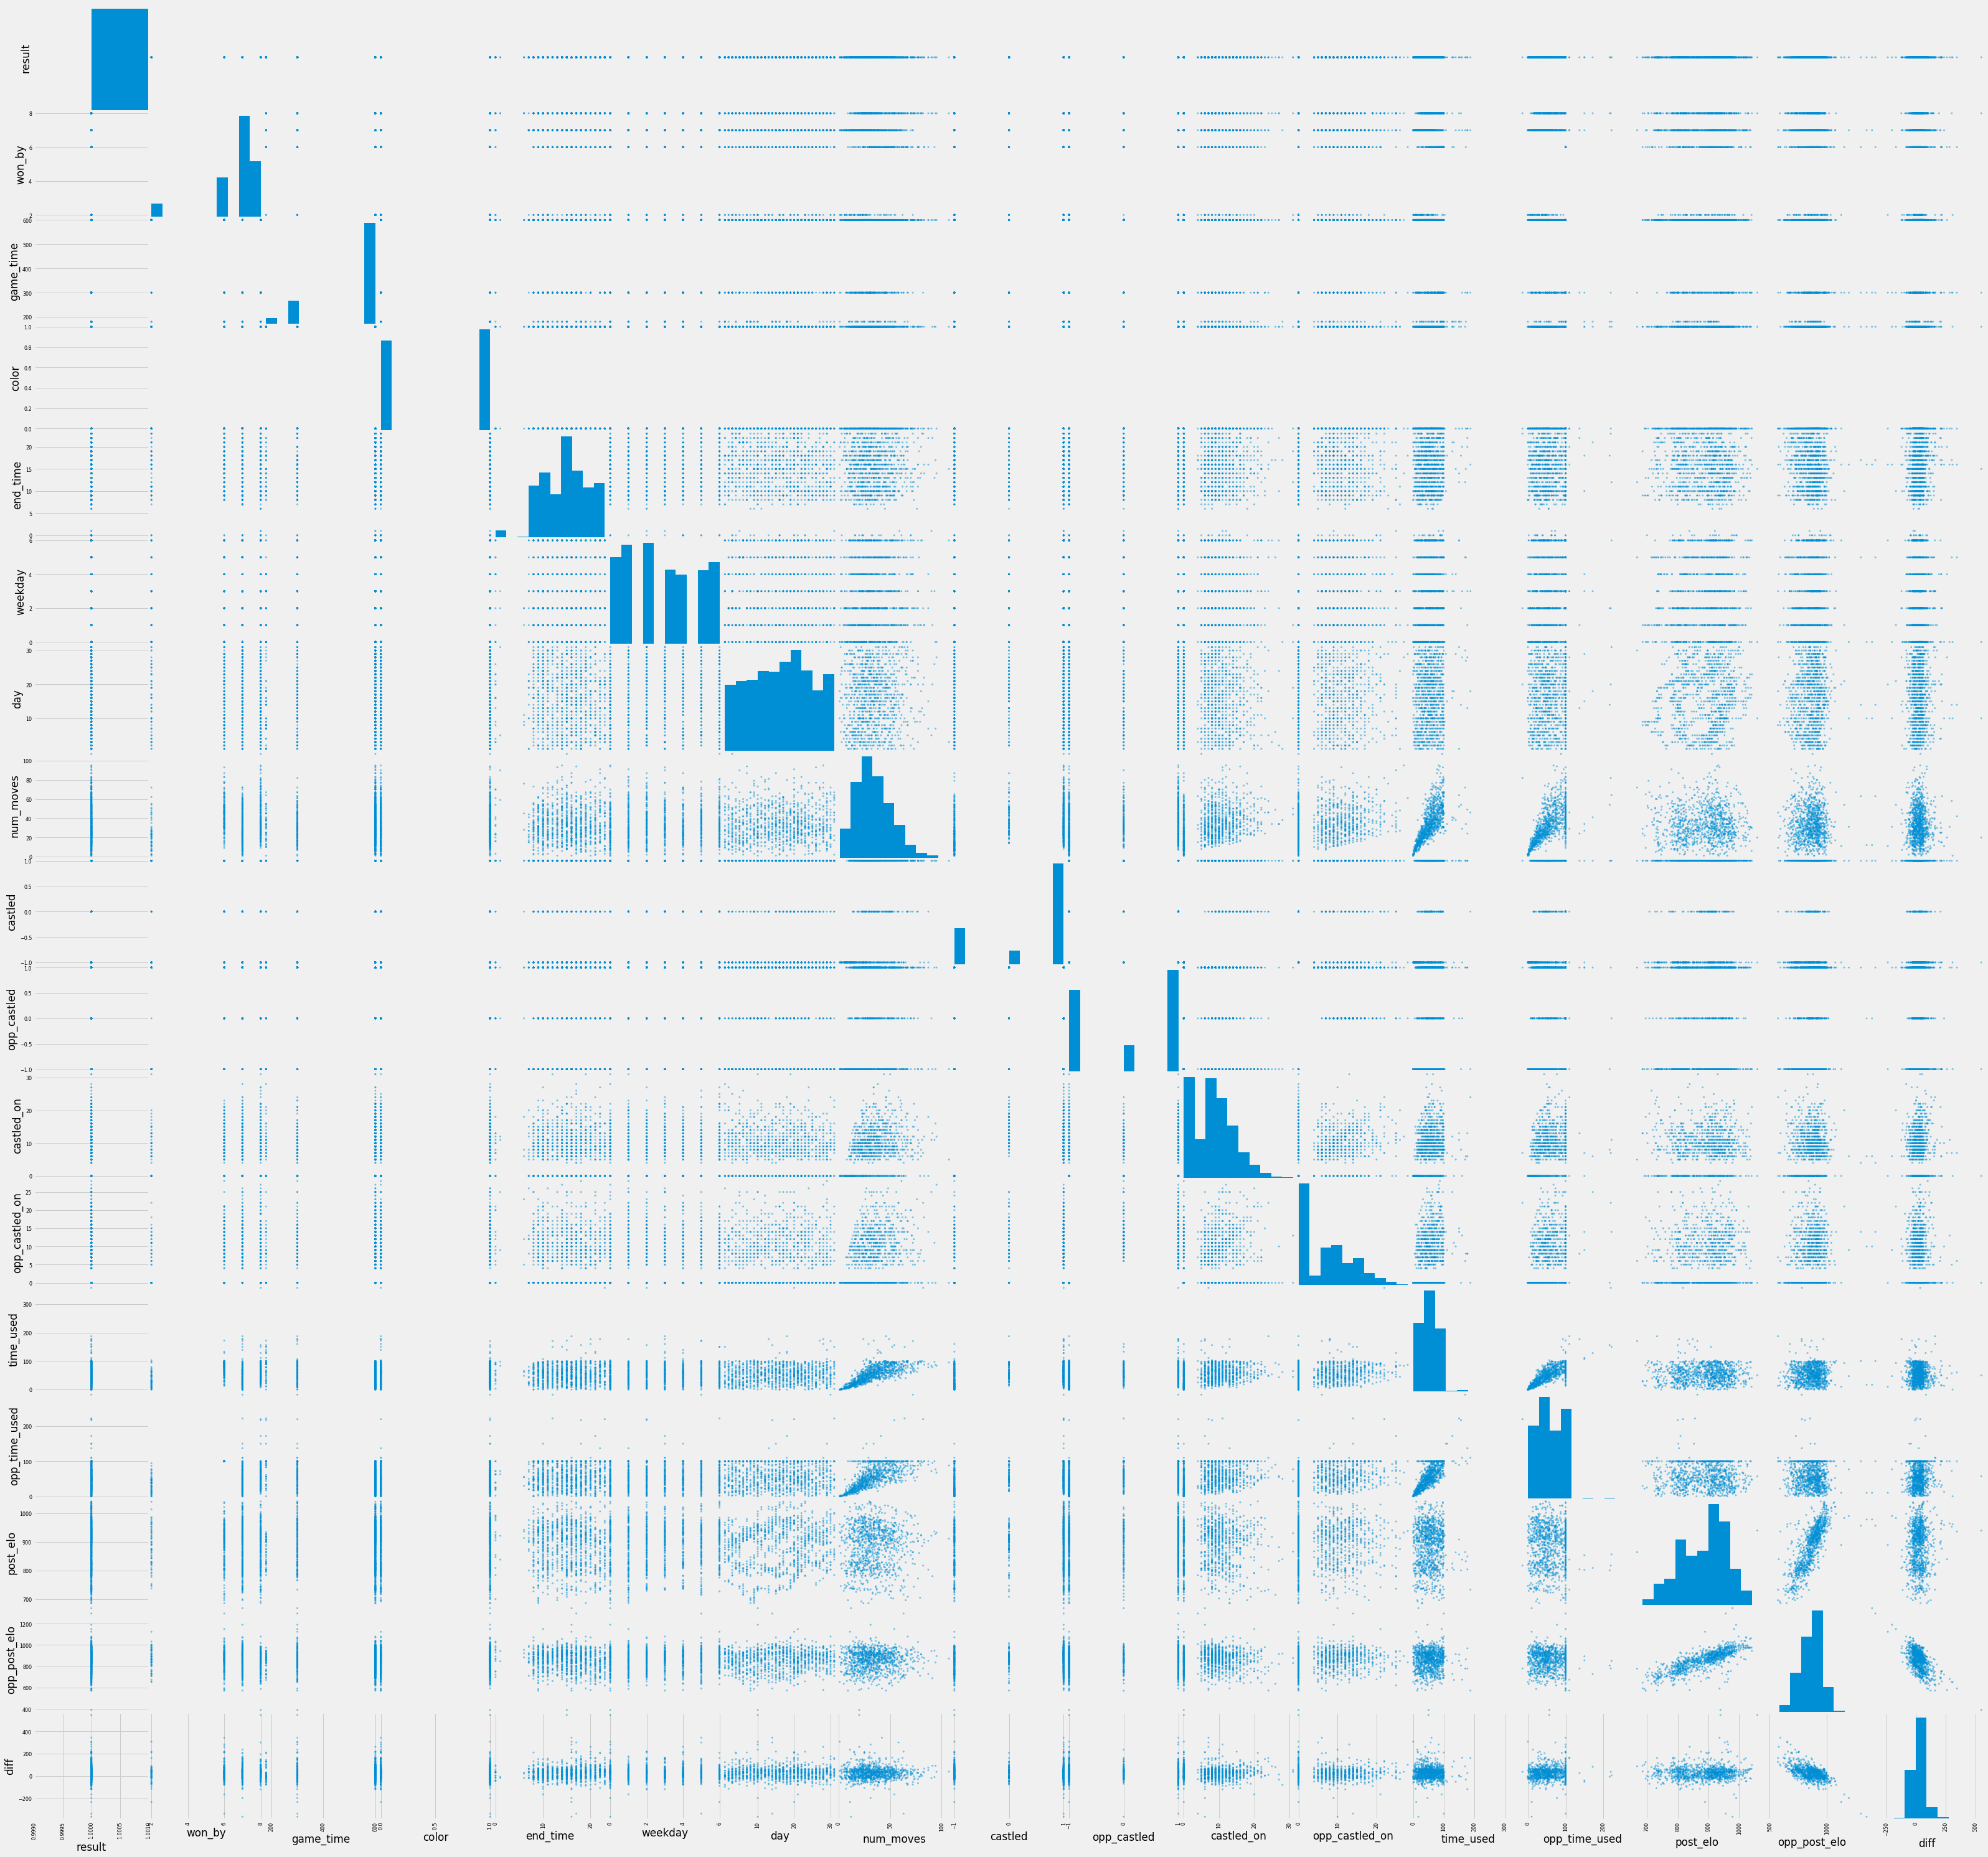

In [114]:
scatter_matrix(df_win, figsize=(50,50))
plt.savefig('scatter_matrix.png')
plt.show()

### Group values in all columns to get max 50 unique values

In [127]:
for num in df.columns:
    a = df[num].nunique()
    if a>=50:
        b = df[num].min()
        c = df[num].max()
        d = df[num].median()
        e = (c-b)
        print(num)
        print(f'unique_values = {a}')
        print(f'min = {b}')
        print(f'max = {c}')
        print(f'median = {d}')
        print(f'at split of 5, you need: {e/5} bins, \nat split of 10, you need: {e/10} bins')
        print(f'at split of 25 you need: {e/25} bins \nat split of 50, you need: {e/50} bins')
        print('-------------------------------------------------------------------------------------------')

num_moves
unique_values = 101
min = 0
max = 127
median = 37.0
at split of 5, you need: 25.4 bins, 
at split of 10, you need: 12.7 bins
at split of 25 you need: 5.08 bins 
at split of 50, you need: 2.54 bins
-------------------------------------------------------------------------------------------
time_used
unique_values = 56
min = 0.0
max = 100.0
median = 12.0
at split of 5, you need: 20.0 bins, 
at split of 10, you need: 10.0 bins
at split of 25 you need: 4.0 bins 
at split of 50, you need: 2.0 bins
-------------------------------------------------------------------------------------------
opp_time_used
unique_values = 55
min = 0.0
max = 100.0
median = 11.0
at split of 5, you need: 20.0 bins, 
at split of 10, you need: 10.0 bins
at split of 25 you need: 4.0 bins 
at split of 50, you need: 2.0 bins
-------------------------------------------------------------------------------------------
post_elo
unique_values = 330
min = 679
max = 1041
median = 896.0
at split of 5, you need: 72.4 bi

### Group the following columns:
1. num_moves
    - total = 26
    - each_bin_range = 5
2. opp_num_moves
    - total = 43
    - each_bin_range = 25 
3. time_used
    - total = 
    - each_bin_range = 25 
4. opp_time_used
    - total = 
    - each_bin_range = 25
5. avg_time
    - total = 
    - each_bin_range = 5
6. opp_avg_time
    - total = 
    - each_bin_range = 5 
7. max_move
    - total = 
    - each_bin_range = 5
8. opp_max_move
    - total = 
    - each_bin_range = 5
9. post_elo
    - total = 
    - each_bin_range = 5 
10. opp_post_elo
    - total = 
    - each_bin_range = 5 
11. elo_diff
    - total = 58
    - each_bin_range = 25 

In [33]:
# df['num_moves'] = df['']
# df['castled_on'] = 
# df['opp_castled_on'] = 
# df['time_used'] = 
# df['opp_time_used'] = 
# df['opp_num_moves'] = 
# df['avg_time'] = 
# df['opp_avg_time'] = 
# df['max_move'] = 
# df['opp_max_move'] = 
# df['post_elo'] = 
# df['opp_post_elo'] = 
# df['time_used'] = 
# df['diff'] = 
# df['castled_on'] = 
# df['opp_castled_on'] = 

In [34]:
df_result_mn = df.groupby(by=['result']).mean()
df_game_time_mn = df.groupby(by=['game_time']).mean()
df_end_time_mn = df.groupby(by=['end_time']).mean()
df_num_moves_mn = df.groupby(by=['num_moves']).mean()
df_color_mn = df.groupby(by=['color']).mean()
df_won_by_mn = df.groupby(by=['won_by']).mean()
df_weekday_mn = df.groupby(by=['weekday']).mean()
df_day_mn = df.groupby(by=['day']).mean()
df_castled_on_mn = df.groupby(by=['castled_on']).mean()
df_opp_castled_on_mn = df.groupby(by=['opp_castled_on']).mean()
df_castled_mn = df.groupby(by=['castled']).mean()
df_opp_castled_mn = df.groupby(by=['opp_castled']).mean()
df_time_used_mn = df.groupby(by=['time_used']).mean()
df_opp_time_used_mn = df.groupby(by=['opp_time_used']).mean()
df_opp_num_moves_mn = df.groupby(by=['opp_num_moves']).mean()
df_avg_time_mn = df.groupby(by=['avg_time']).mean()
df_opp_avg_time_mn = df.groupby(by=['opp_avg_time']).mean()
df_max_move_mn = df.groupby(by=['max_move']).mean()
df_opp_max_move_mn = df.groupby(by=['opp_max_move']).mean()
df_post_elo_mn = df.groupby(by=['post_elo']).mean()
df_opp_post_elo_mn = df.groupby(by=['opp_post_elo']).mean()
df_diff_mn = df.groupby(by=['diff']).mean()

In [35]:
df_result_mdn = df.groupby(by=['result']).median()
df_game_time_mdn = df.groupby(by=['game_time']).median()
df_end_time_mdn = df.groupby(by=['end_time']).median()
df_num_moves_mdn = df.groupby(by=['num_moves']).median()
df_color_mdn = df.groupby(by=['color']).median()
df_won_by_mdn = df.groupby(by=['won_by']).median()
df_weekday_mdn = df.groupby(by=['weekday']).median()
df_day_mdn = df.groupby(by=['day']).median()
df_castled_on_mdn = df.groupby(by=['castled_on']).median()
df_opp_castled_on_mdn = df.groupby(by=['opp_castled_on']).median()
df_castled_mdn = df.groupby(by=['castled']).median()
df_opp_castled_mdn = df.groupby(by=['opp_castled']).median()
df_time_used_mdn = df.groupby(by=['time_used']).median()
df_opp_time_used_mdn = df.groupby(by=['opp_time_used']).median()
df_opp_num_moves_mdn = df.groupby(by=['opp_num_moves']).median()
df_avg_time_mdn = df.groupby(by=['avg_time']).median()
df_opp_avg_time_mdn = df.groupby(by=['opp_avg_time']).median()
df_max_move_mdn = df.groupby(by=['max_move']).median()
df_opp_max_move_mdn = df.groupby(by=['opp_max_move']).median()
df_post_elo_mdn = df.groupby(by=['post_elo']).median()
df_opp_post_elo_mdn = df.groupby(by=['opp_post_elo']).median()
df_diff_mdn = df.groupby(by=['diff']).median()

In [36]:
df_mean_list = [df_result_mn, df_game_time_mn, df_end_time_mn, df_num_moves_mn, 
                df_color_mn, df_won_by_mn, df_weekday_mn, df_day_mn,
                df_castled_on_mn, df_opp_castled_on_mn, df_castled_mn, 
                df_opp_castled_mn, df_time_used_mn, df_opp_time_used_mn, 
                df_opp_num_moves_mn, df_avg_time_mn, df_opp_avg_time_mn, 
                df_max_move_mn, df_opp_max_move_mn, df_post_elo_mn, 
                df_opp_post_elo_mn, df_diff_mn]

In [37]:
df_median_list = [df_result_mdn, df_game_time_mdn, df_end_time_mdn, df_num_moves_mdn, 
                  df_color_mdn, df_won_by_mdn, df_weekday_mdn, df_day_mdn, 
                  df_castled_on_mdn, df_opp_castled_on_mdn, df_castled_mdn, 
                  df_opp_castled_mdn, df_time_used_mdn, df_opp_time_used_mdn, 
                  df_opp_num_moves_mdn, df_avg_time_mdn, df_opp_avg_time_mdn, 
                  df_max_move_mdn, df_opp_max_move_mdn, df_post_elo_mdn, 
                  df_opp_post_elo_mdn, df_diff_mdn]